In [1]:
from keras.callbacks import ModelCheckpoint
from keras import models
from keras.layers import Dense
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
def readData(path):
    data=pd.read_csv(path)
    return data
trainingData=readData('Train/train.csv')
testingData=readData('Test/test.csv')

In [644]:
## Dropping Columns
def dropColumns(df):
    cols_to_drop=['Id','MiscFeature','PoolQC','Fence','FireplaceQu','Alley']
    df.drop(columns=cols_to_drop,inplace=True)
    return df

## Handling Missing Data
def handleMissingData(df):
    cols=df.columns
    for col in cols:
        if df[col].isnull().any():
            if df[col].dtype==np.dtype('object'):
                df[col]=df[col].fillna(df[col].mode().iloc[[0]][0])
            elif df[col].dtype==np.int64 or df[col].dtype==np.float64:
                df[col]=df[col].fillna(df[col].mean())
    return df

trainingData=dropColumns(trainingData)
trainingData=handleMissingData(trainingData)
testingData=dropColumns(testingData)
testingData=handleMissingData(testingData)

In [646]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
trainingData=oneHotEncode(trainingData,trainingData.columns)
testingData=oneHotEncode(testingData,testingData.columns)

In [647]:
target=trainingData['SalePrice']
def getCommonColumns(df1,df2):
    return list(set(df1.columns).intersection(set(df2.columns)))

common_columns=getCommonColumns(trainingData,testingData)
 
trainingData=trainingData[common_columns]
testingData=testingData[common_columns]
trainingData=pd.concat([trainingData,target],axis=1)

In [648]:
XT=trainingData.values[:,:-1]
YT=trainingData.values[:,-1]

Xt=testingData.values

## Model fitting

In [673]:
model=models.Sequential()
model.add(Dense(100,kernel_initializer='normal',activation='relu',input_shape=(254,)))
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 100)               25500     
_________________________________________________________________
dense_197 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_198 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_199 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_200 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 81        
Total params: 53,101
Trainable params: 53,101
Non-trainable params: 0
_________________________________________________

In [674]:
checkpoint_name = 'CheckPoints/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
hist=model.fit(XT,YT,epochs=1000,batch_size=32,validation_split=0.2,callbacks=callbacks_list)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 1s 822us/step - loss: 168184.4858 - mean_absolute_error: 168184.5000 - val_loss: 91603.6997 - val_mean_absolute_error: 91603.6953

Epoch 00001: val_loss improved from inf to 91603.69970, saving model to CheckPoints/Weights-001--91603.69970.hdf5
Epoch 2/1000
1168/1168 [==============================] - 0s 138us/step - loss: 58112.0683 - mean_absolute_error: 58112.0820 - val_loss: 47637.8995 - val_mean_absolute_error: 47637.9023

Epoch 00002: val_loss improved from 91603.69970 to 47637.89951, saving model to CheckPoints/Weights-002--47637.89951.hdf5
Epoch 3/1000
1168/1168 [==============================] - 0s 148us/step - loss: 47944.2362 - mean_absolute_error: 47944.2422 - val_loss: 45248.4514 - val_mean_absolute_error: 45248.4531

Epoch 00003: val_loss improved from 47637.89951 to 45248.45141, saving model to CheckPoints/Weights-003--45248.45141.hdf5
Epoch 4/1000
1168/1168 [========

1168/1168 [==============================] - 0s 139us/step - loss: 23865.3920 - mean_absolute_error: 23865.3867 - val_loss: 28154.0855 - val_mean_absolute_error: 28154.0859

Epoch 00030: val_loss improved from 28314.48833 to 28154.08551, saving model to CheckPoints/Weights-030--28154.08551.hdf5
Epoch 31/1000
1168/1168 [==============================] - 0s 134us/step - loss: 23910.9587 - mean_absolute_error: 23910.9590 - val_loss: 30187.8565 - val_mean_absolute_error: 30187.8555

Epoch 00031: val_loss did not improve from 28154.08551
Epoch 32/1000
1168/1168 [==============================] - 0s 138us/step - loss: 24615.3316 - mean_absolute_error: 24615.3281 - val_loss: 28687.3889 - val_mean_absolute_error: 28687.3906

Epoch 00032: val_loss did not improve from 28154.08551
Epoch 33/1000
1168/1168 [==============================] - 0s 138us/step - loss: 23755.5364 - mean_absolute_error: 23755.5352 - val_loss: 28400.5714 - val_mean_absolute_error: 28400.5723

Epoch 00033: val_loss did not 

Epoch 93/1000
1168/1168 [==============================] - 0s 134us/step - loss: 20680.8570 - mean_absolute_error: 20680.8633 - val_loss: 26680.4654 - val_mean_absolute_error: 26680.4648

Epoch 00093: val_loss did not improve from 25950.36697
Epoch 94/1000
1168/1168 [==============================] - 0s 139us/step - loss: 20509.3704 - mean_absolute_error: 20509.3711 - val_loss: 29567.2244 - val_mean_absolute_error: 29567.2266

Epoch 00094: val_loss did not improve from 25950.36697
Epoch 95/1000
1168/1168 [==============================] - 0s 140us/step - loss: 20834.9638 - mean_absolute_error: 20834.9648 - val_loss: 26189.8644 - val_mean_absolute_error: 26189.8652

Epoch 00095: val_loss did not improve from 25950.36697
Epoch 96/1000
1168/1168 [==============================] - 0s 141us/step - loss: 21066.1959 - mean_absolute_error: 21066.1973 - val_loss: 25885.7997 - val_mean_absolute_error: 25885.7988

Epoch 00096: val_loss improved from 25950.36697 to 25885.79966, saving model to Che

1168/1168 [==============================] - 0s 138us/step - loss: 17188.8792 - mean_absolute_error: 17188.8828 - val_loss: 22575.1901 - val_mean_absolute_error: 22575.1875

Epoch 00155: val_loss improved from 22624.77595 to 22575.19012, saving model to CheckPoints/Weights-155--22575.19012.hdf5
Epoch 156/1000
1168/1168 [==============================] - 0s 135us/step - loss: 17178.8679 - mean_absolute_error: 17178.8672 - val_loss: 22428.6405 - val_mean_absolute_error: 22428.6387

Epoch 00156: val_loss improved from 22575.19012 to 22428.64052, saving model to CheckPoints/Weights-156--22428.64052.hdf5
Epoch 157/1000
1168/1168 [==============================] - 0s 133us/step - loss: 17205.5110 - mean_absolute_error: 17205.5098 - val_loss: 26428.2361 - val_mean_absolute_error: 26428.2383

Epoch 00157: val_loss did not improve from 22428.64052
Epoch 158/1000
1168/1168 [==============================] - 0s 136us/step - loss: 17294.9603 - mean_absolute_error: 17294.9629 - val_loss: 22403.8013

1168/1168 [==============================] - 0s 149us/step - loss: 16857.3860 - mean_absolute_error: 16857.3828 - val_loss: 21839.7521 - val_mean_absolute_error: 21839.7520

Epoch 00187: val_loss did not improve from 21625.02788
Epoch 188/1000
1168/1168 [==============================] - 0s 138us/step - loss: 16390.5727 - mean_absolute_error: 16390.5742 - val_loss: 22741.4003 - val_mean_absolute_error: 22741.4023

Epoch 00188: val_loss did not improve from 21625.02788
Epoch 189/1000
1168/1168 [==============================] - 0s 138us/step - loss: 17392.7962 - mean_absolute_error: 17392.7930 - val_loss: 23148.3752 - val_mean_absolute_error: 23148.3750

Epoch 00189: val_loss did not improve from 21625.02788
Epoch 190/1000
1168/1168 [==============================] - 0s 132us/step - loss: 16638.8702 - mean_absolute_error: 16638.8691 - val_loss: 26450.9149 - val_mean_absolute_error: 26450.9141

Epoch 00190: val_loss did not improve from 21625.02788
Epoch 191/1000
1168/1168 [=============

1168/1168 [==============================] - 0s 135us/step - loss: 17201.8589 - mean_absolute_error: 17201.8594 - val_loss: 22299.3809 - val_mean_absolute_error: 22299.3809

Epoch 00220: val_loss did not improve from 21354.01643
Epoch 221/1000
1168/1168 [==============================] - 0s 138us/step - loss: 15481.3060 - mean_absolute_error: 15481.3096 - val_loss: 21050.0141 - val_mean_absolute_error: 21050.0137

Epoch 00221: val_loss improved from 21354.01643 to 21050.01407, saving model to CheckPoints/Weights-221--21050.01407.hdf5
Epoch 222/1000
1168/1168 [==============================] - 0s 139us/step - loss: 15144.8313 - mean_absolute_error: 15144.8320 - val_loss: 21809.4299 - val_mean_absolute_error: 21809.4297

Epoch 00222: val_loss did not improve from 21050.01407
Epoch 223/1000
1168/1168 [==============================] - 0s 139us/step - loss: 15505.4406 - mean_absolute_error: 15505.4414 - val_loss: 22122.4750 - val_mean_absolute_error: 22122.4727

Epoch 00223: val_loss did n

1168/1168 [==============================] - 0s 133us/step - loss: 14002.8847 - mean_absolute_error: 14002.8857 - val_loss: 21016.9173 - val_mean_absolute_error: 21016.9160

Epoch 00286: val_loss did not improve from 20317.18557
Epoch 287/1000
1168/1168 [==============================] - 0s 140us/step - loss: 15123.8212 - mean_absolute_error: 15123.8223 - val_loss: 21325.3227 - val_mean_absolute_error: 21325.3203

Epoch 00287: val_loss did not improve from 20317.18557
Epoch 288/1000
1168/1168 [==============================] - 0s 143us/step - loss: 15262.4049 - mean_absolute_error: 15262.4043 - val_loss: 20709.8561 - val_mean_absolute_error: 20709.8555

Epoch 00288: val_loss did not improve from 20317.18557
Epoch 289/1000
1168/1168 [==============================] - 0s 140us/step - loss: 13662.6172 - mean_absolute_error: 13662.6152 - val_loss: 20675.9229 - val_mean_absolute_error: 20675.9238

Epoch 00289: val_loss did not improve from 20317.18557
Epoch 290/1000
1168/1168 [=============

1168/1168 [==============================] - 0s 141us/step - loss: 15546.4964 - mean_absolute_error: 15546.4961 - val_loss: 20371.2383 - val_mean_absolute_error: 20371.2402

Epoch 00352: val_loss did not improve from 20060.14694
Epoch 353/1000
1168/1168 [==============================] - 0s 133us/step - loss: 13494.5224 - mean_absolute_error: 13494.5215 - val_loss: 21936.5014 - val_mean_absolute_error: 21936.5039

Epoch 00353: val_loss did not improve from 20060.14694
Epoch 354/1000
1168/1168 [==============================] - 0s 140us/step - loss: 16129.1350 - mean_absolute_error: 16129.1357 - val_loss: 20456.3219 - val_mean_absolute_error: 20456.3223

Epoch 00354: val_loss did not improve from 20060.14694
Epoch 355/1000
1168/1168 [==============================] - 0s 141us/step - loss: 13726.9570 - mean_absolute_error: 13726.9551 - val_loss: 20627.0080 - val_mean_absolute_error: 20627.0078

Epoch 00355: val_loss did not improve from 20060.14694
Epoch 356/1000
1168/1168 [=============

1168/1168 [==============================] - 0s 159us/step - loss: 13408.3922 - mean_absolute_error: 13408.3926 - val_loss: 20185.4706 - val_mean_absolute_error: 20185.4707

Epoch 00385: val_loss did not improve from 19815.11697
Epoch 386/1000
1168/1168 [==============================] - 0s 161us/step - loss: 14071.7579 - mean_absolute_error: 14071.7598 - val_loss: 20100.4640 - val_mean_absolute_error: 20100.4629

Epoch 00386: val_loss did not improve from 19815.11697
Epoch 387/1000
1168/1168 [==============================] - 0s 152us/step - loss: 13903.1274 - mean_absolute_error: 13903.1279 - val_loss: 20257.0932 - val_mean_absolute_error: 20257.0957

Epoch 00387: val_loss did not improve from 19815.11697
Epoch 388/1000
1168/1168 [==============================] - 0s 150us/step - loss: 13385.1221 - mean_absolute_error: 13385.1201 - val_loss: 19690.8272 - val_mean_absolute_error: 19690.8262

Epoch 00388: val_loss improved from 19815.11697 to 19690.82722, saving model to CheckPoints/We

## Plotting MAE

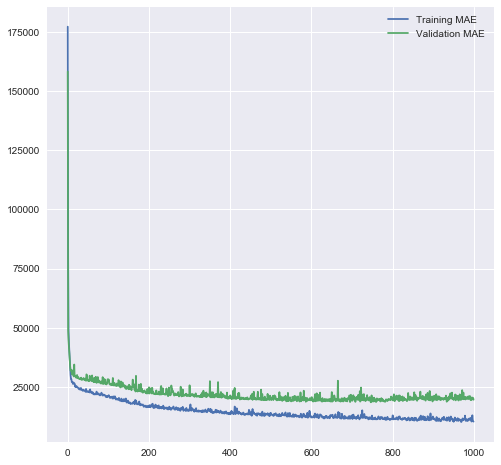

In [669]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
    
def plotLosses(trainLoss,validationLoss):
    plt.plot(trainLoss,label='Training MAE')
    plt.plot(validationLoss,label='Validation MAE')
    plt.legend()
    plt.show()

plotLosses(hist.history['mean_absolute_error'],hist.history['val_mean_absolute_error']) 

## Load weights file of the best model

In [670]:
weights_file = 'CheckPoints/Weights-747--18510.35600.hdf5' # choose the best checkpoint 
model.load_weights(weights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

## Making Predictions

In [671]:
def getPredictions(Xt):
    predictions=model.predict(Xt)
    predictions={'Id':[i for i in range(1461,1461+Xt.shape[0])],'SalePrice':np.array(predictions).reshape(-1,)}
    predictions=pd.DataFrame(predictions)
    predictions.to_csv('KaggleHousingPredictions.csv',index=False)
getPredictions(Xt)